In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
fn = "DlRsrpSinrStats.txt"
df = pd.read_csv(fn, delim_whitespace=True)
column_names = df.columns.values
if column_names[0] == '%':
    column_names = column_names[1:]
    df = df.drop(columns=[column_names[-1],])
    df.columns = column_names

In [7]:
df.loc[df["IMSI"] == 1, "rsrp"]

0        6.721850e-09
2        6.721850e-09
4        6.721840e-09
6        6.721840e-09
8        6.721830e-09
             ...     
99988    6.657930e-11
99990    6.657400e-11
99992    6.656880e-11
99994    6.656350e-11
99996    6.655820e-11
Name: rsrp, Length: 49999, dtype: float64

In [9]:
times = []
rsrps = []
sinrs = []
for n in range(1, 1+2):
    times.append(df.loc[df["IMSI"] == n, "time"].to_numpy())
    rsrps.append(df.loc[df["IMSI"] == n, "rsrp"].to_numpy())
    sinrs.append(df.loc[df["IMSI"] == n, "sinr"].to_numpy())

In [24]:
t1 = df.loc[(df["IMSI"] == 1) & (df["cellId"] == 1), "time"].to_numpy()
t2 = df.loc[(df["IMSI"] == 1) & (df["cellId"] == 2), "time"].to_numpy()
s1 = df.loc[(df["IMSI"] == 1) & (df["cellId"] == 1), "sinr"].to_numpy()
s2 = df.loc[(df["IMSI"] == 1) & (df["cellId"] == 2), "sinr"].to_numpy()


In [30]:
bw = 25   # 25 MHz
cp1 = bw / 8 * np.log(1 + s1) / np.log(2)
cp2 = bw / 8 * np.log(1 + s2) / np.log(2)

In [36]:
def tp(t):
    tp2 = 55 + (65 - 55) / 15 * t
    tp1 = 65 - (65 - 55) / 15 * t
    return tp1, tp2

In [ ]:
class Buffer():     # Sender-side
    def __init__(self, seed=0):
        self.seed = seed
        self.buffer_len = 100
        self.packet_size = 5    # 5 MB
        self.deadline = 0.05    # 50 ms

    def step(self, tp):
        np.random.rand()

In [34]:
dt = 0.01   # 1 frame = 10 ms
buffers = [Buffer(1), Buffer(2)]
fault = np.zeros((int(50 / dt),))

for t in range(0, int(50 / dt)):
    choose_1 = int(np.random.rand() > 0.5)
    buffer = buffers[choose_1]
    buffer.step()
    tp1, tp2 = tp()

0.000214285

49.9992

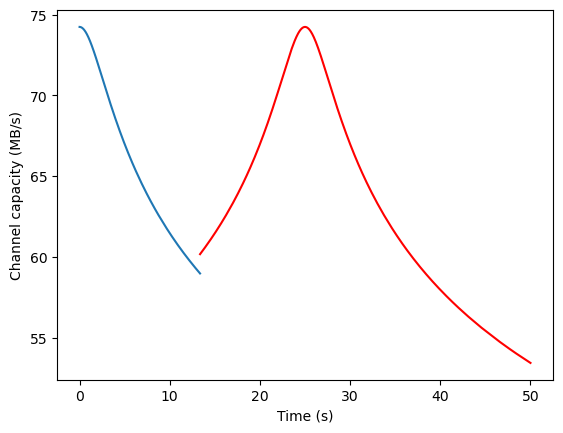

In [31]:
plt.xlabel("Time (s)")
plt.ylabel("Channel capacity (MB/s)")
plt.plot(t1, cp1, t2, cp2, 'r-')

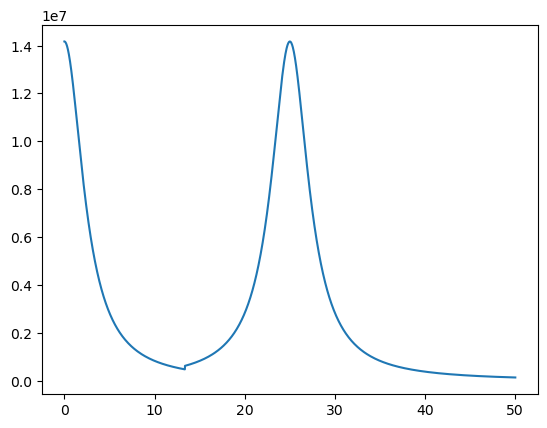

In [12]:
plt.plot(times[0], sinrs[0])
plt.show()

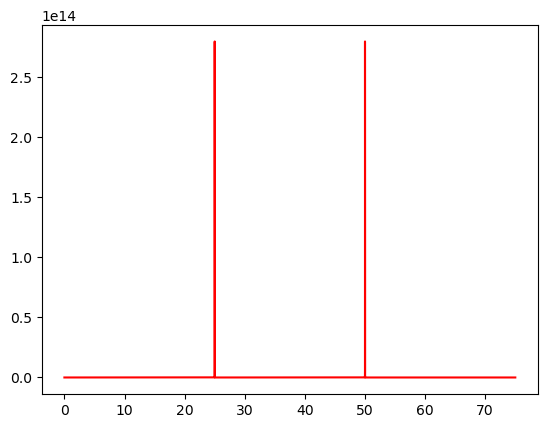

In [5]:
plt.plot(time, sinr, 'r-')
plt.show()